In [1]:
import numpy as np
import pandas as pd

# Load the embeddings
embeddings_small = np.load("embeddings_small.npy")
embeddings_large = np.load("embeddings_large.npy")

# Load attribute names
attributes = pd.read_csv("embeddings_small.csv", index_col=0).index.tolist()

print(f"Loaded {len(attributes)} attributes for clustering.")


Loaded 1962 attributes for clustering.


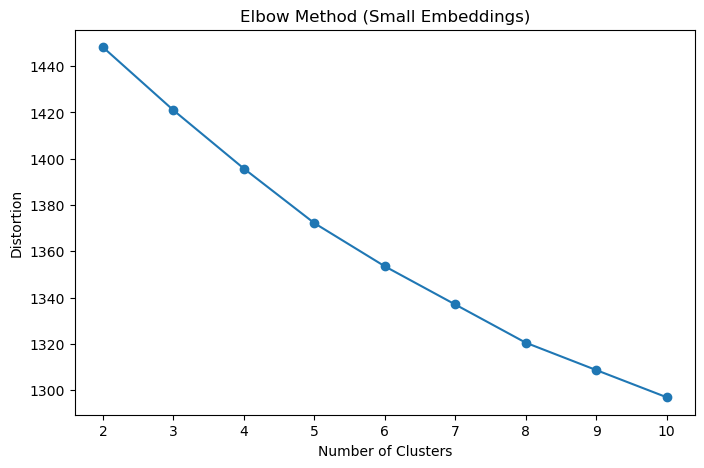

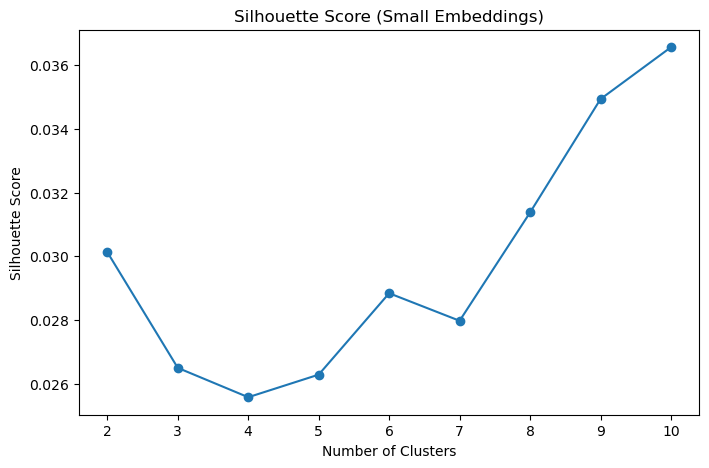

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow Method
def elbow_method(embeddings, max_clusters=10):
    distortions = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(embeddings)
        distortions.append(kmeans.inertia_)
    return distortions

# Plot Elbow Method for small embeddings
distortions_small = elbow_method(embeddings_small)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), distortions_small, marker='o')
plt.title('Elbow Method (Small Embeddings)')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

# Silhouette Score
def silhouette_scores(embeddings, max_clusters=10):
    scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(embeddings)
        scores.append(silhouette_score(embeddings, labels))
    return scores

# Plot Silhouette Scores for small embeddings
silhouette_small = silhouette_scores(embeddings_small)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_small, marker='o')
plt.title('Silhouette Score (Small Embeddings)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [3]:
# Set the number of clusters (based on Elbow Method or Silhouette Score)
num_clusters = 10  # Adjust based on your analysis

# Perform K-Means clustering on small embeddings
kmeans_small = KMeans(n_clusters=num_clusters, random_state=42)
labels_small = kmeans_small.fit_predict(embeddings_small)

# Perform K-Means clustering on large embeddings
kmeans_large = KMeans(n_clusters=num_clusters, random_state=42)
labels_large = kmeans_large.fit_predict(embeddings_large)

# Combine attributes with their cluster labels
clustered_small = pd.DataFrame({
    "Attribute": attributes,
    "Cluster (Small Embeddings)": labels_small
})

clustered_large = pd.DataFrame({
    "Attribute": attributes,
    "Cluster (Large Embeddings)": labels_large
})

# Save clustered results
clustered_small.to_csv("clustered_small_embeddings.csv", index=False)
clustered_large.to_csv("clustered_large_embeddings.csv", index=False)

print(f"Clustering completed and saved for small and large embeddings.")


Clustering completed and saved for small and large embeddings.


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


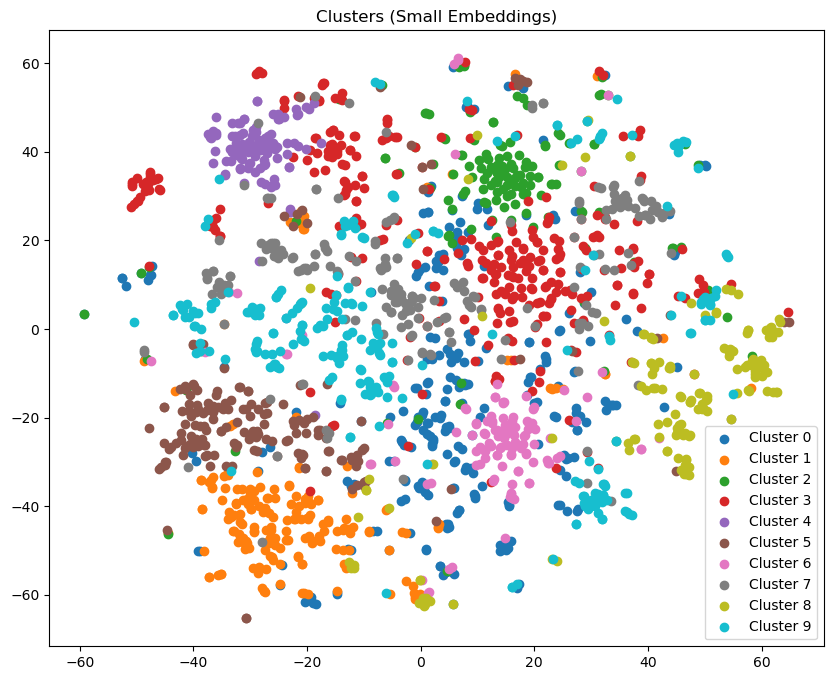

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings_small = tsne.fit_transform(embeddings_small)

# Plot clusters
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_embeddings_small[labels_small == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Clusters (Small Embeddings)')
plt.legend()
plt.show()


In [5]:
# Save detailed clustered attributes with both embedding types
combined_clusters = pd.DataFrame({
    "Attribute": attributes,
    "Cluster (Small)": labels_small,
    "Cluster (Large)": labels_large
})
combined_clusters.to_csv("combined_clusters.csv", index=False)
print("Clustered attributes saved to combined_clusters.csv.")


Clustered attributes saved to combined_clusters.csv.


Cluster_Evaluation_and_Refinement

In [18]:
print(f"Ground Truth Clusters Shape: {len(ground_truth_clusters)}")
print(f"Model Labels Shape: {len(labels_small)}")


Ground Truth Clusters Shape: 1
Model Labels Shape: 1962


In [19]:
print(manual_mapping.columns)


Index(['Category', 'Extracted Attribute', 'Ground Truth Attribute',
       'Mapping Decision'],
      dtype='object')


In [20]:
# Group by 'Ground Truth Attribute' and assign unique cluster IDs
manual_mapping['Mapped Cluster ID'] = manual_mapping.groupby('Ground Truth Attribute').ngroup()

print(manual_mapping.head())


  Category Extracted Attribute Ground Truth Attribute Mapping Decision  \
0  grocery                 UPC             retail_UPC    Similar Match   
1  grocery           Packaging           packing_type    Similar Match   
2  grocery             Packing           packing_type    Similar Match   
3  grocery         PackingType           packing_type    Similar Match   
4  grocery   Packaging Feature           packing_type    Similar Match   

   Mapped Cluster ID  
0                 45  
1                 38  
2                 38  
3                 38  
4                 38  


In [21]:
# Create ground truth clusters based on extracted attributes
ground_truth_clusters = []
for attribute in attributes:
    cluster_id = manual_mapping[manual_mapping["Extracted Attribute"] == attribute]["Mapped Cluster ID"].values
    if len(cluster_id) > 0:
        ground_truth_clusters.append(cluster_id[0])
    else:
        ground_truth_clusters.append(-1)  # Assign -1 for unmapped attributes

print(f"Ground Truth Clusters Shape: {len(ground_truth_clusters)}")


Ground Truth Clusters Shape: 1962


In [22]:
assert len(ground_truth_clusters) == len(attributes), "Mismatch in number of attributes and ground truth clusters."


In [23]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score for small embeddings
silhouette = silhouette_score(embeddings_small, labels_small)
print(f"Silhouette Score (Small Embeddings): {silhouette:.2f}")

# Calculate Davies-Bouldin Index for small embeddings
davies_bouldin = davies_bouldin_score(embeddings_small, labels_small)
print(f"Davies-Bouldin Index (Small Embeddings): {davies_bouldin:.2f}")


Silhouette Score (Small Embeddings): 0.04
Davies-Bouldin Index (Small Embeddings): 4.28


In [24]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assume you have ground truth cluster labels
ground_truth_clusters = ground_truth_clusters  # Replace with actual ground truth labels

# Calculate ARI and NMI
ari = adjusted_rand_score(ground_truth_clusters, labels_small)
nmi = normalized_mutual_info_score(ground_truth_clusters, labels_small)

print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")


Adjusted Rand Index (ARI): -0.00
Normalized Mutual Information (NMI): 0.01


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity between attribute embeddings and cluster centers
cluster_centers = kmeans_small.cluster_centers_
similarities = cosine_similarity(embeddings_small, cluster_centers)

# Identify attributes with low similarity
low_similarity_indices = (similarities.max(axis=1) < 0.5).nonzero()[0]
low_similarity_attributes = [attributes[i] for i in low_similarity_indices]

print("Attributes with low similarity to cluster centers:")
print(low_similarity_attributes)


Attributes with low similarity to cluster centers:
['brewing features', 'shop_name', 'part and supplies quality', 'reinforcement', 'mounting location', 'stones_total_weight', 'genuineness', 'pen_function', 'endorsed by', 'lignin free', 'appointment style', 'casters', 'motor power level', 'cookies flavor', 'shipping restrictions', 'gender', 'heritage/established', 'shipping carrier', 'ideal environments', 'dietary information', 'transfer-safe', 'applied_target', 'warranty (non-oem)', 'warranty (compatible/remanufactured)', 'retraction mechanism', 'photo-safety', 'planning format', 'target_age', 'insulation', 'self-sharpening', 'cookie varieties', 'fire resistant', 'primary use', 'icestyle', 'diamond cut', 'glass properties', 'craftsmanship', 'pre-programmed menu', 'fragrance', 'installs', 'number of levels/tiers', 'moisture absorbency', 'engraved', 'reviewed by', 'weight (lb)', 'warmer', 'punching', 'ice production', 'indicator light', 'amperage', 'indexing system', 'spigot', 'interior 